In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("mtcars.csv")

In [3]:
data.shape

(32, 12)

In [4]:
data.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [5]:
data.tail()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
27,Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.9,1,1,5,2
28,Ford Pantera L,15.8,8,351.0,264,4.22,3.170,14.5,0,1,5,4
29,Ferrari Dino,19.7,6,145.0,175,3.62,2.770,15.5,0,1,5,6
30,Maserati Bora,15.0,8,301.0,335,3.54,3.570,14.6,0,1,5,8
31,Volvo 142E,21.4,4,121.0,109,4.11,2.780,18.6,1,1,4,2


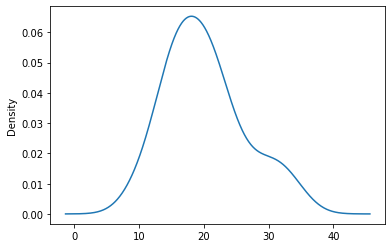

In [6]:
data.mpg.plot(kind='kde')
plt.show()

In [7]:
x = data.drop(['mpg','model'],axis=1)
y = data.mpg
x_constant = sm.add_constant(x)
model = sm.OLS(y, x_constant).fit()
predictions = model.predict(x_constant)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     13.93
Date:                Sat, 25 Jan 2020   Prob (F-statistic):           3.79e-07
Time:                        19:55:00   Log-Likelihood:                -69.855
No. Observations:                  32   AIC:                             161.7
Df Residuals:                      21   BIC:                             177.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.3034     18.718      0.657      0.518     -26.623      51.229
cyl           -0.1114      1.045     -0.107      0.916      -2.285       2.062
disp           0.0133      0.018      0.747      0.463      -0.024       0.050
hp            -0.0215      0.022     -0.987      0.335      -0.067       0.024
drat           0.7871      1.635      0.481      0.635      -2.614       4.188
wt            -3.7153      1.894     -1.961      0.063      -7.655       0.224
qsec           0.8210      0.731      1.123      0.274      -0.699       2.341
vs             0.3178      2.105      0.151      0.881      -4.059       4.694
am             2.5202      2.057      1.225      0.234      -1.757       6.797
gear           0.6554      1.493      0.439      0.665      -2.450       3.761
carb          -0.1994      0.829     -0.241      0.812      -1.923       1.524
==============================================================================
Omnibus:                        1.907   Durbin-Watson:                   1.861
Prob(Omnibus):                  0.385   Jarque-Bera (JB):                1.747
Skew:                           0.521   Prob(JB):                        0.418
Kurtosis:                       2.526   Cond. No.                     1.22e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.22e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
#residual plot
sns.set(style = 'whitegrid')

data['predictions'] = model.predict(x_constant)
residuals = model.resid
residuals

0    -1.599506
1    -1.111886
2    -3.450644
3     0.162595
4     1.006566
5    -2.283039
6    -0.086256
7     1.903988
8    -1.619090
9     0.500970
10   -1.391654
11    2.227838
12    1.700426
13   -0.542225
14   -1.634013
15   -0.536438
16    4.206371
17    4.627094
18    0.503261
19    4.387631
20   -2.143103
21   -1.443053
22   -2.532181
23   -0.006022
24    2.508321
25   -0.993469
26   -0.152954
27    2.763727
28   -3.070041
29    0.006172
30    1.058882
31   -2.968268
dtype: float64

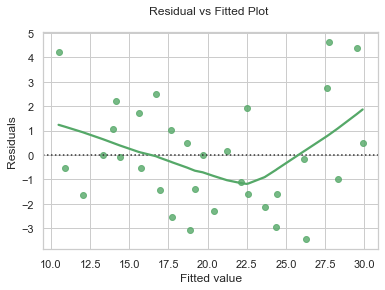

In [9]:
ax = sns.residplot(data.predictions, residuals, lowess = True, color = 'g')
ax.set(xlabel = 'Fitted value', ylabel = 'Residuals', title = 'Residual vs Fitted Plot \n')
plt.show()

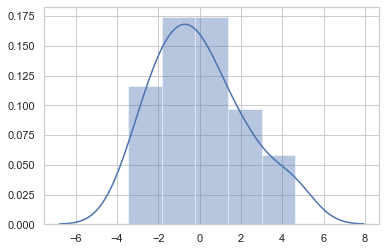

In [10]:
sns.set(style = 'whitegrid')
sns.distplot(residuals)
plt.show()

## Transformation Technique

In [11]:
df = data.copy()

In [12]:
x = data.drop(['model'],axis=1)

In [13]:
#Log transform
df_final = x.transform(lambda x: np.log(x))
df_final.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,predictions
0,3.044522,1.791759,5.075174,4.700480,1.360977,0.963174,2.800933,-inf,0.0,1.386294,1.386294,3.117928
1,3.044522,1.791759,5.075174,4.700480,1.360977,1.056053,2.834389,-inf,0.0,1.386294,1.386294,3.096115
2,3.126761,1.386294,4.682131,4.532599,1.348073,0.841567,2.923699,0.0,0.0,1.386294,0.000000,3.267691
3,3.063391,1.791759,5.552960,4.700480,1.124930,1.167827,2.967333,0.0,-inf,1.098612,0.000000,3.055764
4,2.928524,2.079442,5.886104,5.164786,1.147402,1.235471,2.834389,-inf,-inf,1.098612,0.693147,2.873194


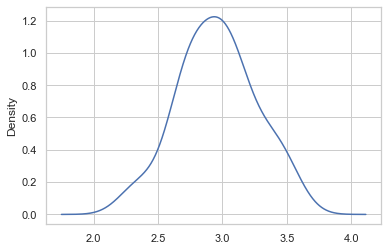

In [14]:
df_final.mpg.plot(kind='kde')
plt.show()

- There are few infinity values as because the data is not so good.

In [15]:
#Inverse transform
df_final1 = x.transform(lambda x: 1/x)
df_final1.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,predictions
0,0.047619,0.166667,0.006250,0.009091,0.256410,0.381679,0.060753,inf,1.0,0.250000,0.25,0.044249
1,0.047619,0.166667,0.006250,0.009091,0.256410,0.347826,0.058754,inf,1.0,0.250000,0.25,0.045225
2,0.043860,0.250000,0.009259,0.010753,0.259740,0.431034,0.053735,1.0,1.0,0.250000,1.00,0.038094
3,0.046729,0.166667,0.003876,0.009091,0.324675,0.311042,0.051440,1.0,inf,0.333333,1.00,0.047087
4,0.053476,0.125000,0.002778,0.005714,0.317460,0.290698,0.058754,inf,inf,0.333333,0.50,0.056518


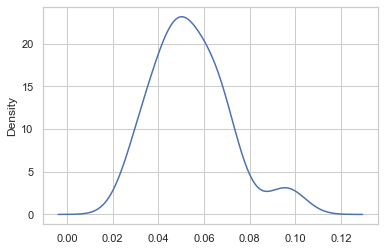

In [16]:
df_final1.mpg.plot(kind='kde')
plt.show()

- There are few infinity values as because the data is not so good. As the data has column values as 0 and 1 so the inverse comes out to be infinity.

In [17]:
df_final2 = x.transform(lambda x: np.exp(x))
df_final2.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,predictions
0,1.318816e+09,403.428793,3.069850e+69,5.920972e+47,49.402449,13.735724,1.407626e+07,1.000000,2.718282,54.598150,54.598150,6.528909e+09
1,1.318816e+09,403.428793,3.069850e+69,5.920972e+47,49.402449,17.725424,2.464292e+07,1.000000,2.718282,54.598150,54.598150,4.009314e+09
2,7.978370e+09,54.598150,8.013164e+46,2.451246e+40,46.993063,10.175674,1.208427e+08,2.718282,2.718282,54.598150,2.718282,2.514837e+11
3,1.967442e+09,403.428793,1.116802e+112,5.920972e+47,21.758402,24.903292,2.771308e+08,2.718282,1.000000,20.085537,2.718282,1.672198e+09
4,1.322229e+08,2980.957987,2.218265e+156,1.003539e+76,23.336065,31.186958,2.464292e+07,1.000000,1.000000,20.085537,7.389056,4.832377e+07


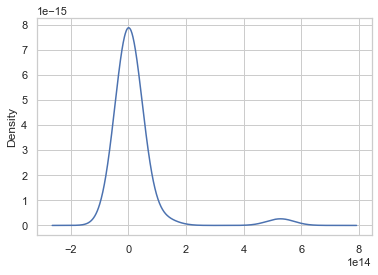

In [18]:
df_final2.mpg.plot(kind='kde')
plt.show()

- Here the distribution is right skewed

## Feature Selection

In [19]:
#1. Pearson Correlation

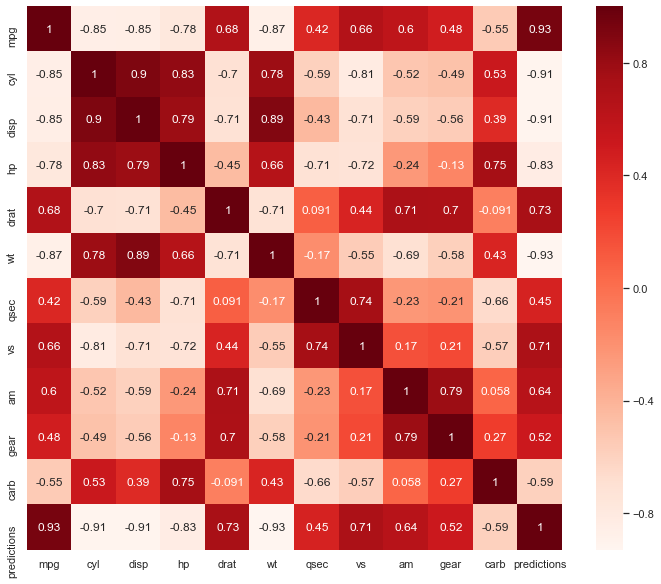

In [20]:
plt.figure(figsize=(12,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [21]:
#Correlation with output variable
cor_target = abs(cor["mpg"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

mpg            1.000000
cyl            0.852162
disp           0.847551
hp             0.776168
drat           0.681172
wt             0.867659
vs             0.664039
am             0.599832
carb           0.550925
predictions    0.932210
Name: mpg, dtype: float64

## Wrapper Method

In [22]:
data = pd.read_csv("mtcars.csv")

In [23]:
x = data.drop(['model','mpg'],axis=1)
y = data.mpg

In [24]:
#Backward elimination

In [25]:
import statsmodels.api as sm 
#Adding constant column of ones, mandatory for sm.OLS model
x_1 = sm.add_constant(x)
#Fitting sm.OLS model
model = sm.OLS(y,x_1).fit()
model.pvalues

const    0.518124
cyl      0.916087
disp     0.463489
hp       0.334955
drat     0.635278
wt       0.063252
qsec     0.273941
vs       0.881423
am       0.233990
gear     0.665206
carb     0.812179
dtype: float64

In [26]:
#Backward Elimination
cols = list(x.columns)
pmax = 1
while (len(cols)>0):
    p= []
    x_1 = x[cols]
    x_1 = sm.add_constant(x_1)
    model = sm.OLS(y,x_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['wt', 'qsec', 'am']


- Final set of variables which are wt, qsec and am

In [27]:
#RFE

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [29]:
model = LinearRegression()

In [30]:
#Initializing RFE model
rfe = RFE(model, 8)

In [31]:
#Transforming data using RFE
x_rfe = rfe.fit_transform(x,y)  
#Fitting the data to model
model.fit(x_rfe,y)
print(rfe.support_)
print(rfe.ranking_)

[ True False False  True  True  True  True  True  True  True]
[1 3 2 1 1 1 1 1 1 1]


In [32]:
x.columns

Index(['cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb'], dtype='object')

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
#no of features
nof_list=np.arange(1,10)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    x_train_rfe = rfe.fit_transform(x_train,y_train)
    x_test_rfe = rfe.transform(x_test)
    model.fit(x_train_rfe,y_train)
    score = model.score(x_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 3
Score with 3 features: 0.316400


- Optimized num of feature is 3 and its accuracy is 31.64%

In [35]:
cols = list(x.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 3)             
#Transforming data using RFE
x_rfe = rfe.fit_transform(x,y)  
#Fitting the data to model
model.fit(x_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['wt', 'qsec', 'am'], dtype='object')


- So, the optimised number of features is 3 and the features are 'wt', 'qsec', 'am'

In [36]:
# Forward Selection

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score as acc
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [38]:
# Build RF classifier to use in feature selection
clf = LinearRegression()

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 0)


# Build step forward feature selection
sfs1 = sfs(clf,k_features = 10,forward=True,
           floating=False, scoring='r2',
           verbose=2,
           cv=5)

# Perform SFFS
sfs1 = sfs1.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished

[2020-01-25 19:55:50] Features: 1/10 -- score: 0.5851166513199562[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished

[2020-01-25 19:55:50] Features: 2/10 -- score: 0.6603220657416463[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished

[2020-01-25 19:55:50] Features: 3/10 -- score: 0.7358645181039485[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [39]:
# Build RF classifier to use in feature selection
clf = LinearRegression()

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 0)


# Build step forward feature selection
sfs1 = sfs(clf,k_features = 5,forward=True,
           floating=False, scoring='r2',
           verbose=2,
           cv=5)

# Perform SFFS
sfs1 = sfs1.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished

[2020-01-25 19:55:50] Features: 1/5 -- score: 0.5851166513199562[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished

[2020-01-25 19:55:51] Features: 2/5 -- score: 0.6603220657416463[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished

[2020-01-25 19:55:51] Features: 3/5 -- score: 0.7358645181039485[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

In [40]:
# Which features?
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[1, 3, 4, 8, 9]


In [41]:
x.columns

Index(['cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb'], dtype='object')

- So, most important features according to the forward selection method is disp, drat, wt, gear, carb